In [1]:
#USEING RANDOM FOREST

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country', 'City', 'AQI Value']]

#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# Feature Engineering
# CALCULATE AVERAGE AQI VALUE PERCITY
city_average_aqi = df.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# BUILD BINS FOR AQI VALUE
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI Category'] = pd.cut(df['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# CALCULATE STATISTICAL FEATURE
city_stats = df.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']


# MERGE THE ENGINEERD FEATURED BACK TO THE ORGINAL DATAFRAME
df = pd.merge(df, city_average_aqi, on='City')
df = pd.merge(df, city_stats, on='City')

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# SPLIT DATA
X = df[['Average AQI Value', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']]
y = df['AQI Value']

# HANDLE MISSING VALUES IN X
imputer = SimpleImputer()
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOMFOREST MODEL
rf_model = RandomForestRegressor(random_state=42)


#FIT THE MODEL ON TRAININFG SET

rf_model.fit(X_train, y_train)

#PREDICTION ON TEST DATA

y_pred = rf_model.predict(X_test)

#EVALUATE MODEL PERFORMENCE

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Mean Squared Error: 4.0672504353727515e-11
R-squared Score: 0.9999999999592185


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Mean Squared Error: 4.0672504353727515e-11
R-squared Score: 0.9999999999592185


C:\Users\nh013\AppData\Local\Temp\ipykernel_4436\2923428369.py:122: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap='jet'))


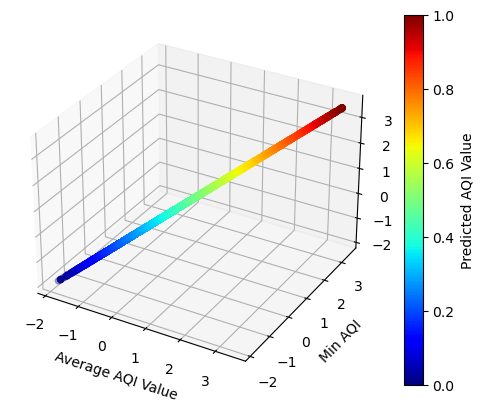

In [2]:
#VISUALIZE RANDOMFOREST IN 3D MODEL

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country', 'City', 'AQI Value']]

#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# Feature Engineering
# CALCULATE AVERAGE AQI VALUE PERCITY
city_average_aqi = df.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# BUILD BINS FOR AQI VALUE
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI Category'] = pd.cut(df['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# CALCULATE STATISTICAL FEATURE
city_stats = df.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']


# MERGE THE ENGINEERD FEATURED BACK TO THE ORGINAL DATAFRAME
df = pd.merge(df, city_average_aqi, on='City')
df = pd.merge(df, city_stats, on='City')

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# SPLIT DATA
X = df[['Average AQI Value', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']]
y = df['AQI Value']

# HANDLE MISSING VALUES IN X
imputer = SimpleImputer()
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOMFOREST MODEL
rf_model = RandomForestRegressor(random_state=42)


#FIT THE MODEL ON TRAININFG SET

rf_model.fit(X_train, y_train)

#PREDICTION ON TEST DATA

y_pred = rf_model.predict(X_test)

#EVALUATE MODEL PERFORMENCE

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


# Create a 3D scatter plot to visualize the predictions
#color ranges from blue to red, where blue represents the lower values and red represents the higher values.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# SELECT 3 FEATURE TO VISUALIZE
feature1 = X_test[:, 0]  # Average AQI Value
feature2 = X_test[:, 1]  # Min AQI
feature3 = X_test[:, 2]  # Max AQI

# CREATED THE PLOT VALUES AS A SCATTER PLOT IN 3D
ax.scatter(feature1, feature2, feature3, c=y_pred, cmap='jet')


ax.set_xlabel('Average AQI Value')
ax.set_ylabel('Min AQI')
ax.set_zlabel('Max AQI')

# ADD A COLOR BAR TO REPRESENT AQI VALUES
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap='jet'))
cbar.set_label('Predicted AQI Value')


plt.show()

C:\Users\nh013\AppData\Local\Temp\ipykernel_4436\3577946286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)


Mean Squared Error: 4.118089999999993
R-squared Score: 0.9951357311599338


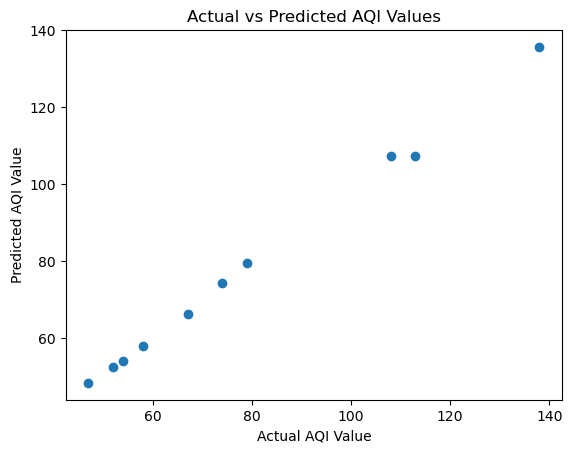

In [7]:
## perform randomforest model to predict AQI VALUE IN Bangladesh cities for the average AQI value, binning, and statistical 
#calculations...FEATURE ENGINEERING


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country', 'City', 'AQI Value']]

#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# Filter data for Bangladesh
df_bangladesh = df[df['Country'] == 'Bangladesh']

# Feature Engineering
# CALCULATE AVERAGE AQI VALUE PERCITY
city_average_aqi = df_bangladesh.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# BUILD BINS FOR AQI VALUE
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df_bangladesh['AQI Category'] = pd.cut(df_bangladesh['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# CALCULATE STATISTICAL FEATURE
city_stats = df_bangladesh.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']

# MERGE THE ENGINEERD FEATURED BACK TO THE ORGINAL DATAFRAME
df_bangladesh = pd.merge(df_bangladesh, city_average_aqi, on='City')
df_bangladesh = pd.merge(df_bangladesh, city_stats, on='City')


# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# SPLIT DATA

X = df_bangladesh[['Average AQI Value', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']]
y = df_bangladesh['AQI Value']


# HANDLE MISSING VALUES IN X
imputer = SimpleImputer()
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOMFOREST MODEL
rf_model = RandomForestRegressor(random_state=42)


#FIT THE MODEL ON TRAININFG SET

rf_model.fit(X_train, y_train)

#PREDICTION ON TEST DATA

y_pred = rf_model.predict(X_test)

#EVALUATE MODEL PERFORMENCE

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Actual vs Predicted AQI Values')
plt.show()

In [8]:
# using ANNs model to predict AQI model each cities for the average AQI value, binning, and statistical 
#calculations...FEATURE ENGINEERING



import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import Adam
import numpy as np

from sklearn.impute import SimpleImputer





# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country', 'City', 'AQI Value']]

#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# Feature Engineering
# CALCULATE AVERAGE AQI VALUE PERCITY
city_average_aqi = df.groupby('City')['AQI Value'].mean().reset_index()
city_average_aqi.columns = ['City', 'Average AQI Value']

# BUILD BINS FOR AQI VALUE
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]
aqi_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI Category'] = pd.cut(df['AQI Value'], bins=aqi_bins[:-1], labels=aqi_labels)

# CALCULATE STATISTICAL FEATURE
city_stats = df.groupby('City')['AQI Value'].agg(['min', 'max', 'std']).reset_index()
city_stats['AQI Range'] = city_stats['max'] - city_stats['min']
city_stats.columns = ['City', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']


# MERGE THE ENGINEERD FEATURED BACK TO THE ORGINAL DATAFRAME
df = pd.merge(df, city_average_aqi, on='City')
df = pd.merge(df, city_stats, on='City')

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# SPLIT DATA
X = df[['Average AQI Value', 'Min AQI', 'Max AQI', 'AQI Std', 'AQI Range']]
y = df['AQI Value']

# HANDLE MISSING VALUE IN X
imputer = SimpleImputer()
X = imputer.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# CCONVERT X_TRAIN TO FLOAT64
X_train = X_train.astype(np.float64)

# CCONVERT Y_TRAIN TO FLOAT64
y_train = y_train.astype(np.float64)

# BUILD THE ANNS MODEL
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# COMPILE THE MODEL
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# TTRAIN MODEL
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# PREDICTION
y_pred = model.predict(X_test)

# EVALUATE THE MODEL
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Epoch 1/50
504/504 [==============================] - 3s 3ms/step - loss: 0.1945
Epoch 2/50
504/504 [==============================] - 1s 3ms/step - loss: 8.9074e-04
Epoch 3/50
504/504 [==============================] - 1s 2ms/step - loss: 6.4698e-05
Epoch 4/50
504/504 [==============================] - 1s 3ms/step - loss: 1.0742e-05
Epoch 5/50
504/504 [==============================] - 1s 2ms/step - loss: 6.7142e-06
Epoch 6/50
504/504 [==============================] - 1s 2ms/step - loss: 4.4100e-06
Epoch 7/50
504/504 [==============================] - 1s 2ms/step - loss: 3.1319e-06
Epoch 8/50
504/504 [==============================] - 1s 2ms/step - loss: 2.3192e-06
Epoch 9/50
504/504 [==============================] - 1s 2ms/step - loss: 1.6858e-06
Epoch 10/50
504/504 [==============================] - 1s 2ms/step - loss: 1.1746e-06
Epoch 11/50
504/504 [==============================] - 1s 2ms/step - loss: 8.2400e-07
Epoch 12/50
504/504 [==============================] - 1s 2ms/step 